In [4]:
from importlib import reload
import matplotlib.pyplot as plt
import dnd

from dnd import Dice
from creatures import get_creatures_df, creature_damage_save, creature_condition_save, get_resistance_stats, creature_damage_roll

import pandas as pd
import numpy as np

creatures = get_creatures_df()
sources = ['MM', 'ToB1-2023', 'MPMM', 'MTF']
creatures = creatures[creatures['source'].isin(sources)].reset_index(drop=True)

Text(0.5, 1.0, 'AC vs CR for 5etools and rpgbot.com')

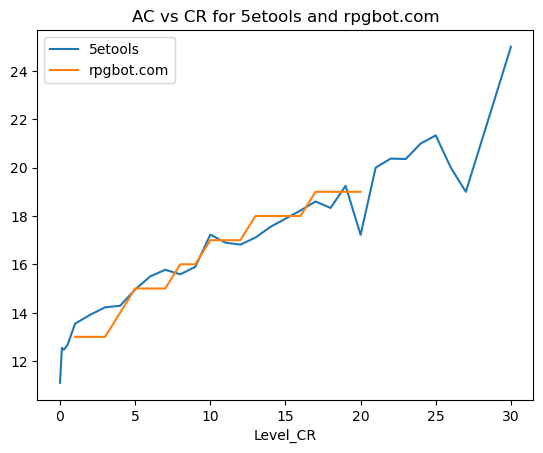

In [5]:
# plot out 5etools AC vs CR and rpgbot.com 'fundamental math' AC vs CR
# https://rpgbot.net/dnd5/characters/fundamental_math/
creatures.groupby('cr').ac_val.mean().plot(label='5etools')
dnd.fundamental_math().groupby('Level_CR').AC.mean().plot(label='rpgbot.com')
plt.legend()
plt.title('AC vs CR for 5etools and rpgbot.com')

In [7]:
# cale is a sorcerer with +5 to cha and +6 to proficiency bonus
spell_save_dc = 19
languages_cale_speaks = set(['C', 'U', 'AB', 'E'])
#save_dc = lambda c: 5+dnd.proficency_bonus(min(max(c['cr'],1), 20))+8

res = []
for c in creatures.iterrows():
    c = c[1]
    web = creature_condition_save(c, 'dex', spell_save_dc, 'restrianed')
    str_check = dnd.save_roll(save_modifier=(c['str']-10)/2, save_dc=spell_save_dc).mean()
    web_2_turns = web * str_check
    psychic_lance = creature_condition_save(c, 'int', spell_save_dc, 'none')
    hypnotic_pattern = creature_condition_save(c, 'wis', spell_save_dc, 'charmed')
    banishment = creature_condition_save(c, 'cha', spell_save_dc, 'banishment')
    polymorph = creature_condition_save(c, 'wis', spell_save_dc, 'polymorphed')
    web_wand = creature_condition_save(c, 'dex', 15, 'restrianed')
    str_check_wand = dnd.save_roll(save_modifier=(c['str']-10)/2, save_dc=15).mean()
    web_wand_2_turns = web * str_check_wand

    sc = lambda x: type(x) != float and len(x) > 0 and len(languages_cale_speaks.intersection(set(x))) > 0
    monster_shares_language_with_cale = sc(c['languageTags'])
    suggestion = creature_condition_save(c, 'wis', spell_save_dc, 'charmed')
    suggestion = monster_shares_language_with_cale and suggestion


    fireball = creature_damage_save(c, 'dex', spell_save_dc, Dice(10,6), 'fire')
    synaptic_static = creature_damage_save(c, 'int',  spell_save_dc, Dice(8,6), 'psychic')

    animate_objects = 10 * creature_damage_roll(c, 'bludgeoning', 8, Dice(1,4), 4).mean()

    # a two level dip in warlock for agonizing blast
    eldritch_blast = 4 * creature_damage_roll(c, 'force', 11, Dice(1,10) , 5+6)

    firebolt = creature_damage_roll(c, 'fire', 11, Dice(4,10))

    res.append({
        'web': web,
        'hypnotic_pattern': hypnotic_pattern,
        'banishment': banishment,
        'polymorph': polymorph,
        'web_wand': web_wand,
        'fireball': fireball,
        'synaptic_static': synaptic_static,
        'suggestion': suggestion,
        'web_2_turns': web_2_turns,
        'web_wand_2_turns': web_wand_2_turns,
        'psychic_lance': psychic_lance,
        'telekenesis': str_check,
        'animate_objects': animate_objects,
        'eldritch_blast': eldritch_blast,
        'firebolt': firebolt
    })

save_columns = ['web', 'hypnotic_pattern', 'banishment', 'polymorph', 'web_wand', 'web_2_turns', 'web_wand_2_turns']
damage_columns= ['fireball', 'synaptic_static', 'animate_objects', 'eldritch_blast', 'firebolt']

creatures_cale = pd.concat([creatures, pd.DataFrame(res)], axis=1)

In [8]:
# plot out dagmage or save probabililtly for each spell on all Ancient Dragons
creatures_cale[creatures_cale['name'].apply(lambda x: 'Ancient' in x and 'Dragon' in x)][['name'] + save_columns + damage_columns]

,name,web,hypnotic_pattern,banishment,polymorph,web_wand,web_2_turns,web_wand_2_turns,fireball,synaptic_static,animate_objects,eldritch_blast,firebolt
266,Ancient Cave Dragon,0.4986,0.3991,0.3492,0.4019,0.2884,0.223024,0.126595,15.6647,22.2430,30.413,40.8760,14.2818
267,Ancient Flame Dragon,0.5028,0.4461,0.3014,0.4498,0.2973,0.327624,0.224852,0.0000,19.4425,23.917,34.2728,0.0000
268,Ancient Mithral Dragon,0.2016,0.0000,0.3453,0.3481,0.0506,0.181097,0.142975,5.2500,18.3274,30.560,20.1220,14.2721
269,Ancient Sea Dragon,0.5975,0.4506,0.3415,0.4554,0.3967,0.301021,0.181939,18.7672,19.3651,24.336,33.9704,12.1261
271,Ancient Void Dragon,0.6001,0.0000,0.2972,0.5039,0.3982,0.301430,0.179730,18.8904,19.6390,23.969,34.8316,12.2251
272,Ancient Wind Dragon,0.4473,0.4524,0.3528,0.4447,0.2555,0.223963,0.131864,13.8478,19.3195,29.850,40.5172,14.4030
678,Ancient Black Dragon,0.4952,0.5034,0.4039,0.5014,0.3023,0.271320,0.170398,15.8943,21.0086,23.849,34.2780,11.8997
679,Ancient Blue Dragon,0.5906,0.4538,0.3492,0.4385,0.3973,0.294119,0.176767,19.1066,19.5167,24.253,33.8816,12.1219
680,Ancient Brass Dragon,0.6566,0.5550,0.4472,0.5460,0.4464,0.354564,0.232042,0.0000,20.9352,30.572,40.9232,0.0000
681,Ancient Bronze Dragon,0.5991,0.4453,0.3534,0.4492,0.3921,0.296974,0.183145,19.1110,19.5244,23.971,33.7684,11.9659


Text(0.5, 1.0, 'Damage per round vs CR for Cale')

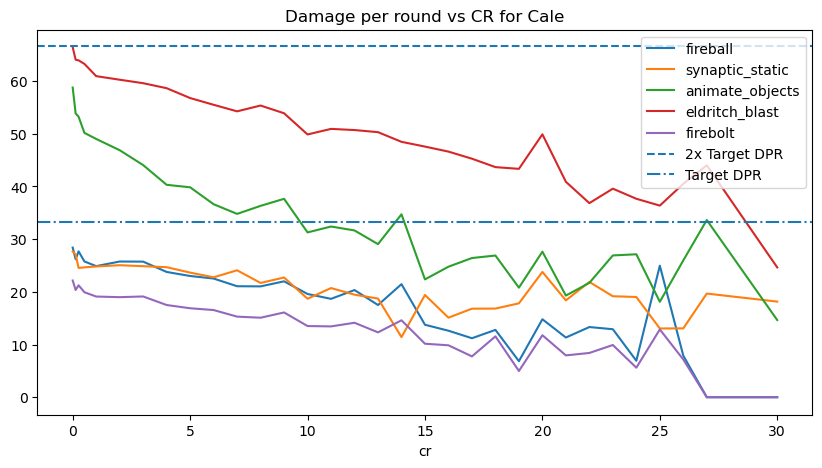

In [9]:
ax = creatures_cale.groupby('cr')[damage_columns].mean().plot(figsize=(10,5))
dpr = dnd.damage_targets().query("Level_CR==20")[['High_DPR', 'Target_DPR']].mean()
plt.axhline(dpr['High_DPR'], linestyle='--', label='2x Target DPR')
plt.axhline(dpr['Target_DPR'], linestyle='-.', label='Target DPR')
plt.legend()
plt.title('Damage per round vs CR for Cale')

Text(0.5, 1.0, 'Save DC vs CR for Cale on various spells')

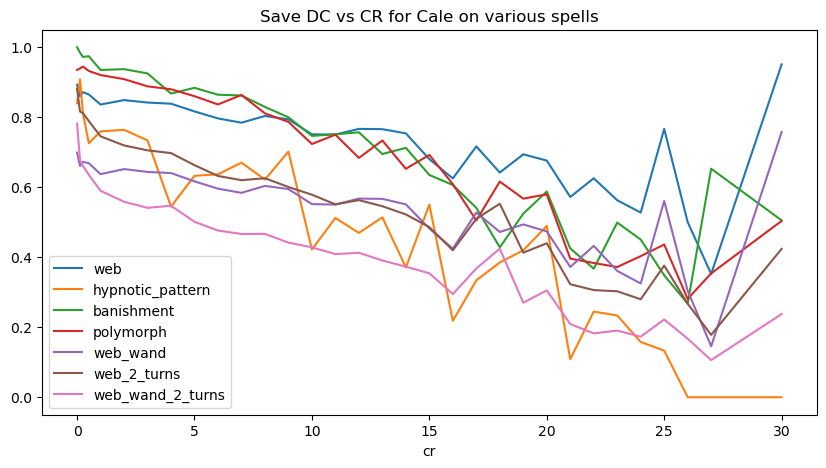

In [10]:
creatures_cale.groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells')

Text(0.5, 1.0, 'Hypnotic pattern looks pretty good except lots of creatures are immune to charm\n(ignoring legendary creatures)')

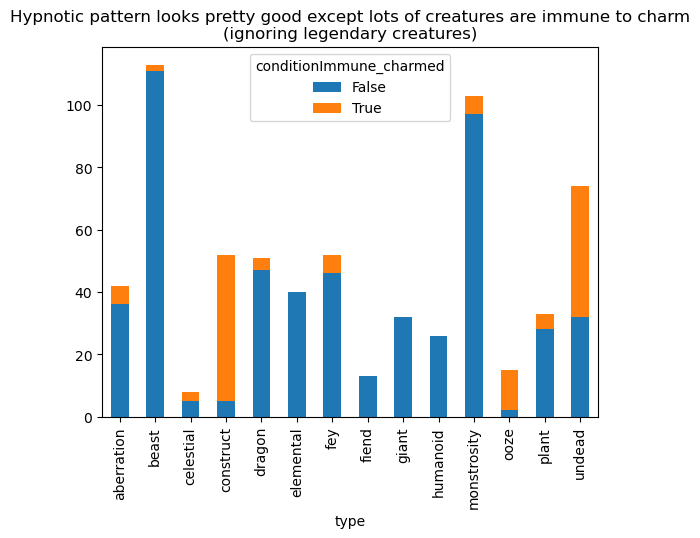

In [12]:
is_legendary = creatures.legendaryGroup_name.isna()

creatures[is_legendary & (creatures.cr<10)].groupby(['type','conditionImmune_charmed']).name.count().fillna(0).unstack().plot(kind='bar', stacked=True)
plt.title('Hypnotic pattern looks pretty good except lots of creatures are immune to charm\n(ignoring legendary creatures)')

Text(0.5, 1.0, 'Save DC vs CR for Cale on various spells for non- constructs, undead, and oozes')

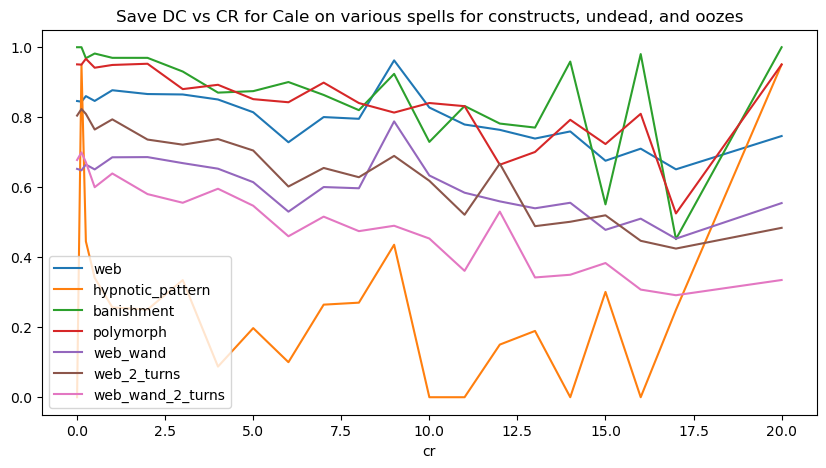

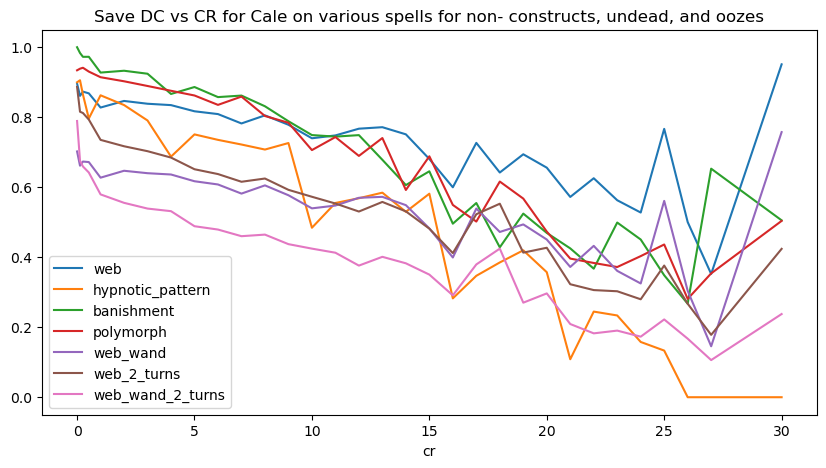

In [13]:
sel = creatures_cale.type.isin(['construct', 'undead', 'ooze'])
creatures_cale[sel].groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells for constructs, undead, and oozes')

sel = ~sel
creatures_cale[sel].groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells for non- constructs, undead, and oozes')

Text(0.5, 1.0, 'very few creatures are immune to restrained')

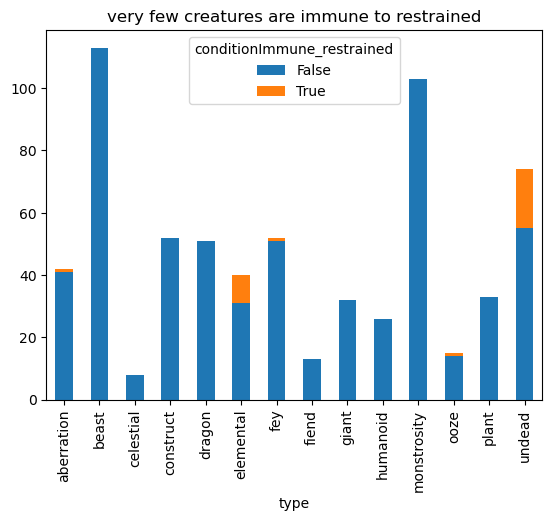

In [81]:
is_legendary = creatures.legendaryGroup_name.isna()

creatures[is_legendary & (creatures.cr<10)].groupby(['type','conditionImmune_restrained']).name.count().fillna(0).unstack().plot(kind='bar', stacked=True)
plt.title('very few creatures are immune to restrained')

Text(0.5, 1.0, 'Bludgeoning resistance by CR')

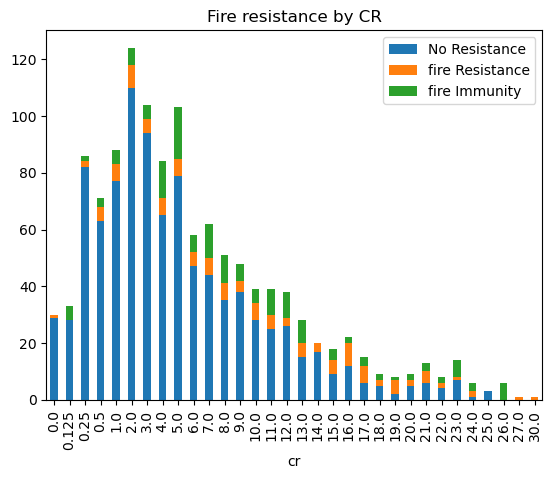

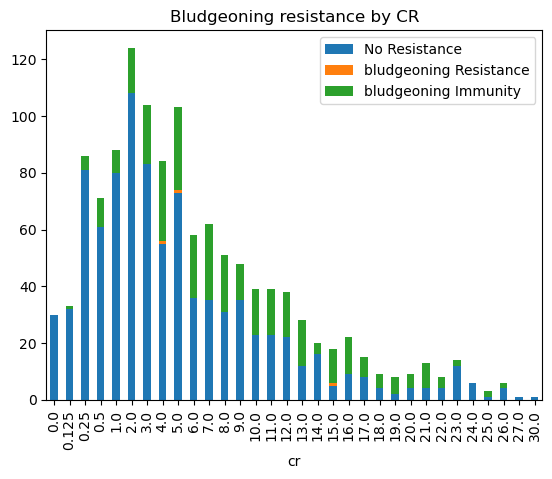

In [83]:
p_df = get_resistance_stats(creatures, 'fire')
plt.title('Fire resistance by CR')

p_df = get_resistance_stats(creatures, 'bludgeoning')
plt.title('Bludgeoning resistance by CR')